<a href="https://colab.research.google.com/github/sagar9926/SceneTextBinarisation/blob/main/SceneTextBinarisation_SlideOtsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
!unzip '/content/drive/MyDrive/SVT/archive.zip' -d /content/scene_text

In [3]:
!git clone https://github.com/sagar9926/SceneTextBinarisation.git

Cloning into 'SceneTextBinarisation'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 104 (delta 56), reused 11 (delta 3), pack-reused 0
Receiving objects: 100% (104/104), 26.20 KiB | 315.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.


In [4]:
# installing requirements 
!pip install -r /content/SceneTextBinarisation/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-yz8tte_r/keras-ocr_5884232fb3d240d2ac2699ed239aa48e
  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-yz8tte_r/keras-ocr_5884232fb3d240d2ac2699ed239aa48e
  Resolved https://github.com/faustomorales/keras-ocr.git to commit b9c5a5871368fc337cbb6cd8f427b64a08626421
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
%run /content/SceneTextBinarisation/data_parse.py

/content/SceneTextBinarisation/data_parse.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(pd.Series(row_list, index = ['image_path','scene_text']), ignore_index=True)
/content/SceneTextBinarisation/data_parse.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(pd.Series(row_list, index = ['image_path','scene_text']), ignore_index=True)
/content/SceneTextBinarisation/data_parse.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(pd.Series(row_list, index = ['image_path','scene_text']), ignore_index=True)
/content/SceneTextBinarisation/data_parse.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

In [6]:
%run /content/SceneTextBinarisation/SlideOtsu.py

/usr/local/lib/python3.9/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Running Otsu's Binarisation : 
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 35ms/step
Running Slide_Otsu's Binarisation : 
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 49ms/step
Evaluating Model Performances ... 
Comparison of text similarity scores for the two methods (Otsu v/s Slide_Otsu): 
       score_otsu  score_slide_otsu
count  322.000000        322.000000
mean    57.273292         62.105590
std     26.439135         21.126412
min      0.000000          0.000000
25%     38.000000         48.250000
50%     58.000000         60.000000
75%     75.000000         76.750000
max    100.000000        100.000000


## Inference 

In [14]:
cd /content/SceneTextBinarisation/

/content/SceneTextBinarisation


In [21]:
from SlideOtsu import SlideOtsu
import cv2
import os
import matplotlib.pyplot as plt
def clean() :
  if os.path.exists("/content/slide_otsu"):
    os.system("rm -rf /content/slide_otsu")
 
  if os.path.exists("/content/otsu"):
    os.system("rm -rf /content/otsu")

## Example 1 :

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


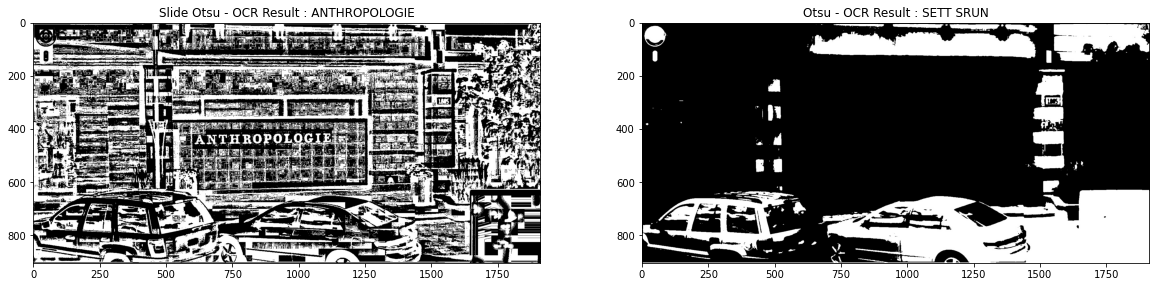

In [46]:
clean()
## Method : Slide Otsu
slide_otsu1 = SlideOtsu('/content/scene_text/img/03_05.jpg','/content',method = 'slide_otsu')
binary_img= slide_otsu1.run_slide_otsu()
result_sotsu = slide_otsu1.ocr_extract()
sotsu_binarise_img = cv2.imread(result_sotsu[0][0])

##  Method : Otsu
slide_otsu2 = SlideOtsu('/content/scene_text/img/03_05.jpg','/content',method = 'otsu')
binary_img= slide_otsu2.run_otsu()
result_otsu = slide_otsu2.ocr_extract()
otsu_binarise_img = cv2.imread(result_otsu[0][0])

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(sotsu_binarise_img)
ax1.set_title(f'Slide Otsu - OCR Result : {(result_sotsu[0][1]).upper()}')


ax2 = fig.add_subplot(2,2,2)
ax2.imshow(otsu_binarise_img)
ax2.set_title(f'Otsu - OCR Result : {(result_otsu[0][1]).upper()}')
plt.show()

## Example 2 : 

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


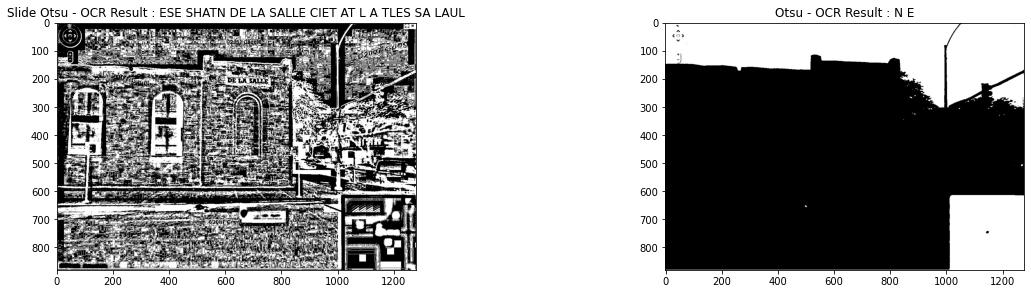

In [39]:
clean()
## Method : Slide Otsu
slide_otsu1 = SlideOtsu('/content/scene_text/img/05_14.jpg','/content',method = 'slide_otsu')
binary_img= slide_otsu1.run_slide_otsu()
result_sotsu = slide_otsu1.ocr_extract()
sotsu_binarise_img = cv2.imread(result_sotsu[0][0])

##  Method : Otsu
slide_otsu2 = SlideOtsu('/content/scene_text/img/05_14.jpg','/content',method = 'otsu')
binary_img= slide_otsu2.run_otsu()
result_otsu = slide_otsu2.ocr_extract()
otsu_binarise_img = cv2.imread(result_otsu[0][0])

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(sotsu_binarise_img)
ax1.set_title(f'Slide Otsu - OCR Result : {(result_sotsu[0][1]).upper()}')


ax2 = fig.add_subplot(2,2,2)
ax2.imshow(otsu_binarise_img)
ax2.set_title(f'Otsu - OCR Result : {(result_otsu[0][1]).upper()}')
plt.show()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


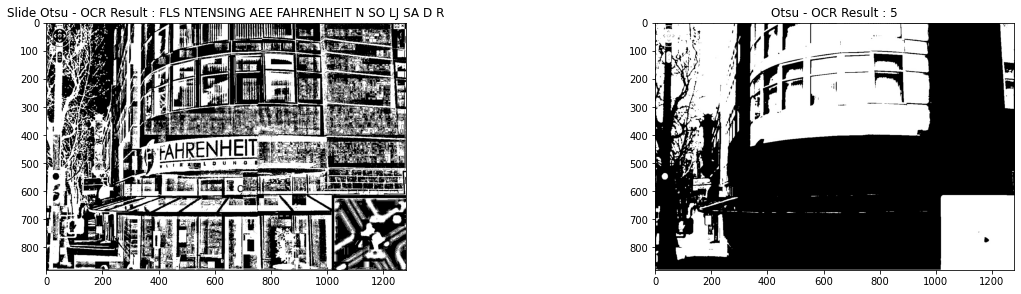

In [45]:
clean()
## Method : Slide Otsu
slide_otsu1 = SlideOtsu('/content/scene_text/img/17_17.jpg','/content',method = 'slide_otsu')
binary_img= slide_otsu1.run_slide_otsu()
result_sotsu = slide_otsu1.ocr_extract()
sotsu_binarise_img = cv2.imread(result_sotsu[0][0])

##  Method : Otsu
slide_otsu2 = SlideOtsu('/content/scene_text/img/17_17.jpg','/content',method = 'otsu')
binary_img= slide_otsu2.run_otsu()
result_otsu = slide_otsu2.ocr_extract()
otsu_binarise_img = cv2.imread(result_otsu[0][0])

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(sotsu_binarise_img)
ax1.set_title(f'Slide Otsu - OCR Result : {(result_sotsu[0][1]).upper()}')


ax2 = fig.add_subplot(2,2,2)
ax2.imshow(otsu_binarise_img)
ax2.set_title(f'Otsu - OCR Result : {(result_otsu[0][1]).upper()}')
plt.show()